# 导入库

## 导入pytoch并检查是否为GPU

In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## 导入其它库

In [2]:
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pickle

# 定义文件名和将要存储数据的变量名
files_to_load = {
    'total_elec.pkl': 'total_elec',     #3维
    'total_spms.pkl': 'total_spms',     #2维
    'total_chg.pkl': 'total_chg',      #1维
    'total_vfukui.pkl': 'total_vfukui',   #1维
    'total_Pop.pkl': 'total_Pop',      #1维
    'total_Mol.pkl': 'total_Mol',      #0维
    'total_IP_EA.pkl': 'total_IP_EA',    #0维


    'total_out_basics_final.pkl': 'total_out_basics_final', #索引
    'total_energy.pkl': 'total_energy'  #回归值输出


}

# 创建一个字典来存储加载的数据
loaded_data = {}

# 循环遍历文件并加载数据
for file_name, data_name in files_to_load.items():
    with open("out_data/"+file_name, 'rb') as file:
        loaded_data[data_name] = pickle.load(file)

In [5]:
total_energy=np.array(loaded_data['total_energy']).astype(np.float32)

In [49]:
def categorize_energy(energy):
    if energy < 30:
        return 30
    elif energy >= 40:
        return 40
    else:
        return energy

In [50]:
categorized_energy = np.array([categorize_energy(e) for e in total_energy])
categorized_energy

array([36.14713669, 39.33295441, 40.        , 39.11709595, 38.07544327,
       40.        , 34.6210556 , 35.86162567, 35.35962677, 35.11991882,
       36.25381088, 37.9091568 , 40.        , 30.8660965 , 37.9693985 ,
       40.        , 40.        , 39.95355225, 39.28463745, 33.1865921 ,
       34.67816162, 37.54771805, 37.31616974, 30.        , 30.61446953,
       30.        , 30.        , 39.19678879, 36.54748154, 36.1973381 ,
       30.79456139, 37.36950684, 40.        , 37.766716  , 36.0442276 ,
       35.07536697, 37.76797104, 34.09082031, 35.77314758, 33.92076874,
       34.89715576, 33.98665619, 36.41570663, 35.11364365, 33.92641449,
       31.6812191 , 35.5924263 , 35.79008865, 38.22541809, 35.76499176,
       30.43249512, 35.11238861, 33.91700363, 31.68310165, 35.57046509,
       35.79448318, 38.22541809, 35.75369644, 30.42810249, 34.0832901 ,
       37.88594055, 34.81746674, 36.66419601, 33.58882141, 36.44080734,
       37.0940361 , 32.16753387, 31.74648094, 35.31570053, 34.58

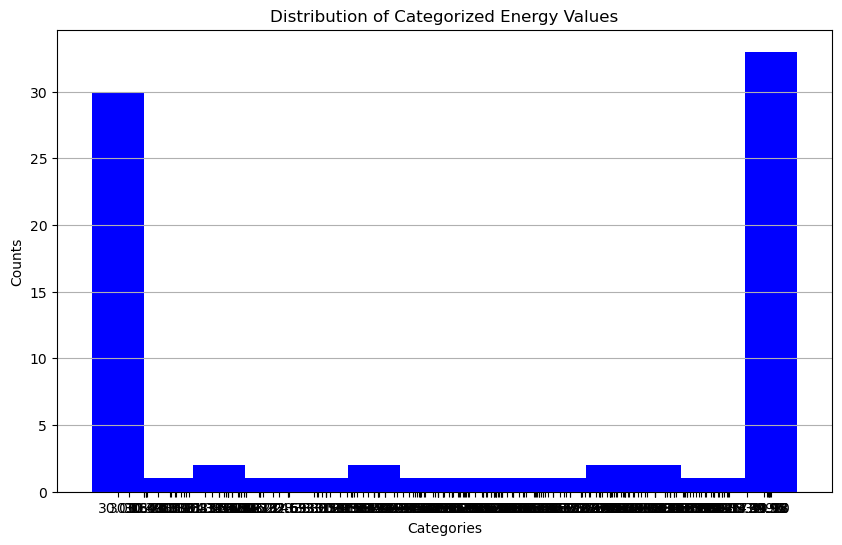

In [51]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in categorized_energy
categories, counts = np.unique(categorized_energy, return_counts=True)

# Create a bar plot to show the distribution
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='blue')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categorized Energy Values')
plt.xticks(categories)
plt.grid(axis='y')
plt.show()


In [6]:
total_energy

array([36.147137, 39.332954, 40.407864, 39.117096, 38.075443, 40.46308 ,
       34.621056, 35.861626, 35.359627, 35.11992 , 36.25381 , 37.909157,
       41.393036, 30.866096, 37.9694  , 42.34621 , 42.252712, 39.953552,
       39.284637, 33.186592, 34.67816 , 37.547718, 37.31617 , 29.905396,
       30.61447 , 29.382687, 29.04572 , 39.19679 , 36.54748 , 36.19734 ,
       30.794561, 37.369507, 44.98422 , 37.766716, 36.044228, 35.075367,
       37.76797 , 34.09082 , 35.773148, 33.92077 , 34.897156, 33.986656,
       36.415707, 35.113644, 33.926414, 31.68122 , 35.592426, 35.79009 ,
       38.225418, 35.76499 , 30.432495, 35.11239 , 33.917004, 31.683102,
       35.570465, 35.794483, 38.225418, 35.753696, 30.428102, 34.08329 ,
       37.88594 , 34.817467, 36.664196, 33.58882 , 36.440807, 37.094036,
       32.167534, 31.74648 , 35.3157  , 34.58529 , 38.45257 , 37.151764,
       37.53956 , 39.973633, 33.04917 , 28.226206, 36.66043 , 33.586937,
       36.442062, 37.093407, 32.17004 , 31.745852, 

# 数据准备并清洗

## 2d & 3d 的准备
2d为spms，形状为10*20
3d为elec，形状为7*7*7

In [52]:
elec = []
spms = []

for i in range(len(loaded_data['total_out_basics_final'])):
    indices = [index - 1 for index in loaded_data['total_out_basics_final'][i][0]]
    elec_values = [loaded_data['total_elec'][i][index] for index in indices]
    elec.append(elec_values)

    spms_values = [loaded_data['total_spms'][i][index] for index in indices]
    spms.append(spms_values)
elec = np.array(elec)
spms = np.array(spms)
print(elec.shape,spms.shape)

(291, 6, 7, 7, 7) (291, 6, 10, 20)


## 1d 的准备
由电荷，福井函数等组成，在列的方向上进行了归一化

In [13]:
chg = []
vfukui = []
Pop = []

for i in range(len(loaded_data['total_out_basics_final'])):
    indices = [index - 1 for index in loaded_data['total_out_basics_final'][i][0]]
    chg_values = [loaded_data['total_chg'][i][index] for index in indices]
    chg.append(chg_values)

    vfukui_values = [loaded_data['total_vfukui'][i][index] for index in indices]
    vfukui.append(vfukui_values)

    Pop_values = [loaded_data['total_Pop'][i][index] for index in indices]
    Pop.append(Pop_values)
chg = np.array(chg)
vfukui = np.array(vfukui)[:, :, 1:]
Pop=np.array(Pop)[:, :, 3:]
print(chg.shape,vfukui.shape,Pop.shape)
resule_x_1d = np.concatenate((chg[:, :, np.newaxis], vfukui), axis=2).astype(np.float32)
print(resule_x_1d.shape)
normalized_result = np.empty_like(resule_x_1d)
for i in range(resule_x_1d.shape[2]):
    slice_i = resule_x_1d[:, :, i]
    min_val = np.min(slice_i)
    max_val = np.max(slice_i)
    if min_val != max_val:
        normalized_slice = 2 * ((slice_i - min_val) / (max_val - min_val)) - 1
    else:
        normalized_slice = np.zeros_like(slice_i)
    normalized_result[:, :, i] = normalized_slice
print(normalized_result.shape)

(291, 6) (291, 6, 3) (291, 6, 4)
(291, 6, 4)
(291, 6, 4)


## 0d数据
分子整体的数据

In [14]:
IP_EA=np.array(loaded_data['total_IP_EA'])
Mol=np.array(loaded_data['total_Mol'])
IP_EA=IP_EA * 627.5

# 神经网络部分

## 定义数据集和数据库

In [53]:
from torch.utils.data import Dataset, DataLoader ,random_split

class ComplexDataset(Dataset):
    def __init__(self, elec, spms, normalized_result, energy):
        self.elec = torch.tensor(elec, dtype=torch.float32)  # 将elec转换为张量
        self.spms = torch.tensor(spms, dtype=torch.float32)  # 将spms转换为张量
        self.normalized_result = torch.tensor(normalized_result, dtype=torch.float32)  # 将additional_data转换为张量
        self.energy = torch.tensor(energy, dtype=torch.float32)  # 将energy转换为张量

    def __len__(self):
        return len(self.energy)  # 返回样本总数

    def __getitem__(self, idx):
        # 根据索引返回单个样本
        return self.spms[idx], self.elec[idx], self.normalized_result[idx], self.energy[idx]

# 创建ComplexDataset实例
dataset = ComplexDataset(elec, spms, normalized_result, categorized_energy)
normalized_result.shape

(291, 6, 4)

In [54]:

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# 随机划分数据集
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 在创建DataLoader时使用
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

## 定义神经网络

In [55]:
class CrossModalAttention(nn.Module):
    def __init__(self, query_dim, key_dim, value_dim):
        super(CrossModalAttention, self).__init__()
        self.query_layer = nn.Linear(query_dim, value_dim)
        self.key_layer = nn.Linear(key_dim, value_dim)
        self.value_layer = nn.Linear(key_dim, value_dim)
    
    def forward(self, query, keys, values):
        query = self.query_layer(query)  # [Batch, Query_Dim]
        keys = self.key_layer(keys)      # [Batch, Key_Dim]
        values = self.value_layer(values)# [Batch, Value_Dim]
        
        # Reshape for bmm
        query = query.unsqueeze(2)  # [Batch, Query_Dim, 1]
        keys = keys.unsqueeze(1)    # [Batch, 1, Key_Dim]
        
        # Compute attention scores and apply to values
        # After unsqueeze: query is [Batch, Query_Dim, 1], keys is [Batch, 1, Key_Dim]
        attention_scores = F.softmax(torch.bmm(keys, query), dim=-1)  # [Batch, 1, 1]
        
        # Expand and apply scores to values
        values = values.unsqueeze(1)  # [Batch, 1, Value_Dim]
        attended_values = attention_scores * values  # Element-wise multiplication
        attended_values = attended_values.squeeze(1)  # Removing the singleton dimension
        
        return attended_values



In [58]:
from torch import nn
import torch.nn.functional as F
class SimplifiedConvNet(nn.Module):
    def __init__(self):
        super(SimplifiedConvNet, self).__init__()
        # 2D数据的卷积层
        self.conv2d_1 = nn.Conv2d(6, 32, kernel_size=2, stride=1, padding=1)
        self.bn2d_1 = nn.BatchNorm2d(32)
        self.maxpool2d_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2d_2 = nn.Conv2d(32, 64, kernel_size=1, stride=1, padding=1)
        self.bn2d_2 = nn.BatchNorm2d(64)
        self.maxpool2d_2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 3D数据的卷积层
        self.conv3d_1 = nn.Conv3d(6, 32, kernel_size=2, stride=1, padding=1)
        self.bn3d_1 = nn.BatchNorm3d(32)
        self.maxpool3d_1 = nn.MaxPool3d(kernel_size=2, stride=2)
        
        self.conv3d_2 = nn.Conv3d(32, 64, kernel_size=1, stride=1, padding=1)
        self.bn3d_2 = nn.BatchNorm3d(64)
        self.maxpool3d_2 = nn.MaxPool3d(kernel_size=2, stride=2)

        self.fc_1d1 = nn.Linear(6 * 4, 128)
        self.fc_1d2 = nn.Linear(128, 256)
        self.bn1d_1 = nn.BatchNorm1d(256)
        self.dropout2d = nn.Dropout(p=0.4)
        self.dropout3d = nn.Dropout(p=0.5)
        self.dropout1d = nn.Dropout(p=0.05)   
        self.dropout = nn.Dropout(p=0.3)   
        
        self.weight_2d = nn.Parameter(torch.ones(1))
        self.weight_3d = nn.Parameter(torch.ones(1))
        self.weight_1d = nn.Parameter(torch.ones(1))


        self.fc1 = nn.Linear(1152+1728+256, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64,1)
        
        self.attention_2d_to_3d = CrossModalAttention(query_dim=1152, key_dim=1728, value_dim=1728)
        self.attention_3d_to_2d = CrossModalAttention(query_dim=1728, key_dim=1152, value_dim=1152)

    def forward(self, x2d, x3d, x1d):
        # 处理2D数据
        x2d = F.relu(self.bn2d_1(self.conv2d_1(x2d)))
        x2d = self.maxpool2d_1(x2d)
        x2d = F.relu(self.bn2d_2(self.conv2d_2(x2d)))
        x2d = self.maxpool2d_2(x2d)
        x2d = x2d.flatten(1)
        # 处理3D数据
        x3d = F.relu(self.bn3d_1(self.conv3d_1(x3d)))
        x3d = self.maxpool3d_1(x3d)
        x3d = F.relu(self.bn3d_2(self.conv3d_2(x3d)))
        x3d = self.maxpool3d_2(x3d)
        x3d = x3d.flatten(1)

        x1d = x1d.view(x1d.size(0),-1)
        x1d = F.relu(self.fc_1d1(x1d))
        x1d = F.relu(self.fc_1d2(x1d))
        x1d = self.bn1d_1(x1d)

        
        attended_3d = self.attention_2d_to_3d(x2d, x3d, x3d)
        attended_2d = self.attention_3d_to_2d(x3d, x2d, x2d)
        
        x2d = self.dropout2d(attended_2d)
        x3d = self.dropout3d(attended_3d)
        x1d = self.dropout1d(x1d)          
        
        weighted_2d = self.weight_2d * x2d
        weighted_3d = self.weight_3d * x3d
        weighted_1d = self.weight_1d * x1d
        
        combined = torch.cat((weighted_2d, weighted_3d, weighted_1d), dim=1)

    
        x = F.relu(self.fc1(combined))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.fc6(x)

        return x


In [59]:
%%time
import torch
import torch.optim as optim
from torch.optim import lr_scheduler

def train_and_evaluate_model(model, train_dataloader, test_dataloader, epochs, learning_rate):
    # 定义损失函数
    criterion = nn.MSELoss()
    
    # 定义优化器和学习率衰减
    l2_lambda = 0.001
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)  # 每100个epoch学习率乘以0.1

    for epoch in range(epochs):
        if epoch < 500:lambda_weight=0.000001
        else :lambda_weight=0.00001
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for inputs_2d, inputs_3d, inputs_1d, targets in train_dataloader:
            inputs_2d, inputs_3d, inputs_1d, targets = inputs_2d.to(device), inputs_3d.to(device), inputs_1d.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs_2d, inputs_3d, inputs_1d).squeeze(1)
            loss = criterion(outputs, targets)
            weight_reg = lambda_weight * (model.weight_2d.norm(2) + model.weight_3d.norm(2) + model.weight_1d.norm(2))
            loss += weight_reg

            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_dataloader)

        # 测试阶段
        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs_2d, inputs_3d, inputs_1d, targets in test_dataloader:
                inputs_2d, inputs_3d, inputs_1d, targets = inputs_2d.to(device), inputs_3d.to(device), inputs_1d.to(device), targets.to(device)
                outputs = model(inputs_2d, inputs_3d, inputs_1d).squeeze(1)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item()

        avg_test_loss = running_test_loss / len(test_dataloader)

        print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
        
        # 更新学习率
        scheduler.step()

    print('Finished Training and Evaluation')

# 用您的模型和数据初始化函数
model = SimplifiedConvNet().to(device)
train_and_evaluate_model(model, train_dataloader, test_dataloader, epochs=1000, learning_rate=0.01)


Epoch [1/1000], Training Loss: 1542.4643, Test Loss: 84.8309
Epoch [2/1000], Training Loss: 123.4714, Test Loss: 29.0368
Epoch [3/1000], Training Loss: 103.5761, Test Loss: 28.5275
Epoch [4/1000], Training Loss: 64.9659, Test Loss: 24.7681
Epoch [5/1000], Training Loss: 60.5825, Test Loss: 13.5414
Epoch [6/1000], Training Loss: 62.7275, Test Loss: 15.6456
Epoch [7/1000], Training Loss: 65.4588, Test Loss: 80.5691
Epoch [8/1000], Training Loss: 56.0571, Test Loss: 13.6701
Epoch [9/1000], Training Loss: 41.4198, Test Loss: 79.9206
Epoch [10/1000], Training Loss: 48.5374, Test Loss: 55.4369
Epoch [11/1000], Training Loss: 36.6162, Test Loss: 21.2923
Epoch [12/1000], Training Loss: 40.9177, Test Loss: 54.1730
Epoch [13/1000], Training Loss: 43.8088, Test Loss: 33.0534
Epoch [14/1000], Training Loss: 47.0345, Test Loss: 180.9216
Epoch [15/1000], Training Loss: 33.3506, Test Loss: 61.4184
Epoch [16/1000], Training Loss: 58.3660, Test Loss: 188.5971
Epoch [17/1000], Training Loss: 41.3394, Te

In [162]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

291
261
30


In [115]:
from tensorboardX import SummaryWriter

writer = SummaryWriter('./runs')

In [ ]:
writer.add_scalar('mAP', mAP, epoch)

# 可视化部分

In [145]:
from torchsummary import summary
print(summary(model, input_shape=[(6, 10, 20), (6, 7, 7, 7), (6, 4)]))

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            800
├─BatchNorm2d: 1-2                       64
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            2,112
├─BatchNorm2d: 1-5                       128
├─MaxPool2d: 1-6                         --
├─Conv3d: 1-7                            1,568
├─BatchNorm3d: 1-8                       64
├─MaxPool3d: 1-9                         --
├─Conv3d: 1-10                           2,112
├─BatchNorm3d: 1-11                      128
├─MaxPool3d: 1-12                        --
├─Linear: 1-13                           3,200
├─Linear: 1-14                           33,024
├─BatchNorm1d: 1-15                      512
├─Dropout: 1-16                          --
├─Dropout: 1-17                          --
├─Dropout: 1-18                          --
├─Linear: 1-19                           3,212,288
├─Linear: 1-20                           524,800
├─Linear: 1-21                         

In [60]:
%%time
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn

def train_and_evaluate_model(model, train_dataloader, test_dataloader, epochs, learning_rate):
    # 定义损失函数 - 对于11分类任务，使用交叉熵损失
    criterion = nn.CrossEntropyLoss()
    
    # 定义优化器和学习率衰减
    l2_lambda = 0.001
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)  # 每100个epoch学习率乘以0.1

    for epoch in range(epochs):
        if epoch < 500: lambda_weight=0.000001
        else: lambda_weight=0.00001
        
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for inputs_2d, inputs_3d, inputs_1d, targets in train_dataloader:
            inputs_2d, inputs_3d, inputs_1d, targets = inputs_2d.to(device), inputs_3d.to(device), inputs_1d.to(device), targets.to(device)
            targets = targets.long()
            optimizer.zero_grad()
            outputs = model(inputs_2d, inputs_3d, inputs_1d)
            loss = criterion(outputs, targets)
            weight_reg = lambda_weight * (model.weight_2d.norm(2) + model.weight_3d.norm(2) + model.weight_1d.norm(2))
            loss += weight_reg

            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_dataloader)

        # 测试阶段
        model.eval()
        running_test_loss = 0.0
        total_test = 0
        correct_test = 0
        with torch.no_grad():
            for inputs_2d, inputs_3d, inputs_1d, targets in test_dataloader:
                inputs_2d, inputs_3d, inputs_1d, targets = inputs_2d.to(device), inputs_3d.to(device), inputs_1d.to(device), targets.to(device)
                targets = targets.long()
                outputs = model(inputs_2d, inputs_3d, inputs_1d)
                loss = criterion(outputs, targets)
                running_test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += targets.size(0)
                correct_test += (predicted == targets).sum().item()
        avg_test_loss = running_test_loss / len(test_dataloader)
        test_accuracy = 100 * correct_test / total_test
        print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
        
        # 更新学习率
        scheduler.step()

    print('Finished Training and Evaluation')

# 确保你的模型定义中的最后一层是nn.Linear(32, 11)或相应的11类输出
model = SimplifiedConvNet().to(device)
train_and_evaluate_model(model, train_dataloader, test_dataloader, epochs=10000, learning_rate=0.01)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
